<a href="https://colab.research.google.com/github/kkwakkwaks/CP2_-/blob/main/cp2_0921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [3]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False 

In [4]:
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
pip install -U pandas-profiling

In [6]:
import pandas_profiling

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [8]:
# path = '/content/drive/MyDrive/cp2/0227_0917 ·Ñé·Ö¢·Ñê·Öµ·Üº ·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•_·Ñé·Ö¨·Ñå·Ö©·Üº·Ñá·Ö©·Ü´.xlsx'
# # path = '/content/gdrive/MyDrive/cp2/0227_0917 ·Ñé·Ö¢·Ñê·Öµ·Üº ·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•_·Ñé·Ö¨·Ñå·Ö©·Üº·Ñá·Ö©·Ü´.xlsx'

# df_chat = pd.read_excel(path,sheet_name = 0) # Ï±ÑÌåÖÎç∞Ïù¥ÌÑ∞
# df_chatR = pd.read_excel(path,sheet_name = 1) # Ï±ÑÌåÖ Î°úÏö∞Îç∞Ïù¥ÌÑ∞
# df_room = pd.read_excel(path,sheet_name = 2) # Î∞© Ï†ïÎ≥¥
# df_celeb = pd.read_excel(path,sheet_name = 3) # ÏÖÄÎüΩ Ï†ïÎ≥¥

In [45]:
path_celeb = '/content/drive/MyDrive/cp2/celebrity.csv'
path_char  = '/content/drive/MyDrive/cp2/chat_data.csv'
path_charR = '/content/drive/MyDrive/cp2/chat_raw.csv'
path_room  = '/content/drive/MyDrive/cp2/room_info.csv'

df_celeb = pd.read_csv(path_celeb,encoding='CP949')
df_chat  = pd.read_csv(path_char,encoding='CP949')
# df_chatR = pd.read_csv(path_charR,encoding='CP949')
df_room  = pd.read_csv(path_room,encoding='CP949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 1. celeb data

In [11]:
df_celeb

ÎãâÎÑ§ÏûÑ                    Ïù¥Î©îÏùº  Î∞©Ïù∏Ïõê                    ÌöåÏõêÍ∞ÄÏûÖÏùº  \
0             Í∑ÄÏö§Ìö®ÎãùÎÄ®     azaazaez@gmail.com    4  2022-09-19 10:30:21.710   
1              ÏùÄÎã¥ÎπÑ_   tamptambin@naver.com    1  2022-09-18 23:37:01.460   
2               ÏïàÏπòÏ£º   eamy101247@naver.com    1  2022-09-18 18:45:22.980   
3              Ìã∞ÏïÑÏø†ÏïÑ   tiaqua1013@naver.com    1  2022-09-18 17:30:49.457   
4               Ïò•Ïà≠ÏïÑ   wnghkdznzl@naver.com    1  2022-09-18 17:15:54.370   
...             ...                    ...  ...                      ...   
1378            ÏÜîÎ°úÎ™¨   rlawjddnja1@daum.net    4  2021-06-18 07:07:39.000   
1379             ÏúÑÏπ≠     witching_@daum.net  135  2021-06-12 13:53:34.000   
1380   ÌïúÎÇòÎûë ÎöúÎöúÎûë ÏÇºÎèôÏù¥üî•  ziniworking@gmail.com   20  2021-06-12 10:42:59.000   
1381  ÎßêÏçΩ NO.1 Í≥†ÏòÅÌù¨ üêà         dana@fancim.me   42  2021-06-12 05:56:31.000   
1382    z_spiderman       lado86@naver.com    6  2021-06-12 01:19:24.000   

        Î≥¥Ïú†ÏÉ∑     Î∞õÏùÄÏÉ∑  ÏÖÄÎüΩ Ïó¨Î∂Ä  
0       NaN     NaN  celeb  
1       NaN     NaN  celeb  
2       NaN     NaN  celeb  
3       NaN     NaN  celeb  
4       NaN     NaN  celeb  
...     ...     ...    ...  
1378    NaN     NaN  celeb  
1379   40.0  4570.0  celeb  
1380    NaN   233.0  celeb  
1381  300.0     5.0  celeb  
1382    NaN     NaN  celeb  

[1383 rows x 7 columns]

In [9]:
df_celeb[df_celeb['Î∞©Ïù∏Ïõê'] != 1]

ÎãâÎÑ§ÏûÑ                      Ïù¥Î©îÏùº  Î∞©Ïù∏Ïõê                    ÌöåÏõêÍ∞ÄÏûÖÏùº  \
0             Í∑ÄÏö§Ìö®ÎãùÎÄ®       azaazaez@gmail.com    4  2022-09-19 10:30:21.710   
5      Martina Rose   rose@onebitstudios.com   11  2022-09-18 11:31:51.763   
6              ÎïÖÏΩ©Ïù¥Ïïº        iamddce@naver.com   21  2022-09-17 22:47:31.360   
10              Í∏ÄÎùºÏÑ∏  sweet.glace92@gmail.com   22  2022-09-16 21:36:33.353   
13              ÌïúÎùºÎ¥Ñ      han_rabom@naver.com   21  2022-09-16 14:01:39.980   
...             ...                      ...  ...                      ...   
1378            ÏÜîÎ°úÎ™¨     rlawjddnja1@daum.net    4  2021-06-18 07:07:39.000   
1379             ÏúÑÏπ≠       witching_@daum.net  135  2021-06-12 13:53:34.000   
1380   ÌïúÎÇòÎûë ÎöúÎöúÎûë ÏÇºÎèôÏù¥üî•    ziniworking@gmail.com   20  2021-06-12 10:42:59.000   
1381  ÎßêÏçΩ NO.1 Í≥†ÏòÅÌù¨ üêà           dana@fancim.me   42  2021-06-12 05:56:31.000   
1382    z_spiderman         lado86@naver.com    6  2021-06-12 01:19:24.000   

        Î≥¥Ïú†ÏÉ∑     Î∞õÏùÄÏÉ∑  ÏÖÄÎüΩ Ïó¨Î∂Ä  
0       NaN     NaN  celeb  
5       NaN     NaN  celeb  
6       NaN   210.0  celeb  
10      NaN     NaN  celeb  
13      NaN     NaN  celeb  
...     ...     ...    ...  
1378    NaN     NaN  celeb  
1379   40.0  4570.0  celeb  
1380    NaN   233.0  celeb  
1381  300.0     5.0  celeb  
1382    NaN     NaN  celeb  

[987 rows x 7 columns]

## 2. chatR data

In [12]:
# df_chatR.head()

message_id                                        channel_url  \
0  1701907401  sendbird_group_channel_38649690_0c2f6fa0c6fd20...   
1  1701907472  sendbird_group_channel_38649690_0c2f6fa0c6fd20...   
2  1701914782  sendbird_group_channel_46714279_5689ed3637baad...   
3  1701937405  sendbird_group_channel_47434712_1b4c1283dc929d...   
4  1701973210  sendbird_group_channel_47137877_f7e02b815f1428...   

            sender_id     sender_nickname  type              message  \
0  witching_@daum.net                  ÏúÑÏπ≠  MESG      ÏúºÏñ¥~ Ïò§ÎäòÎèÑ Ïû¨Î∞åÏóâ„ÖéÏäµÎãàÎã§   
1  witching_@daum.net                  ÏúÑÏπ≠  MESG                  @,@   
2   lch6191@naver.com           dvl zzang  MESG  dvl zzang ÎãòÏù¥ ÎÇòÍ∞îÏäµÎãàÎã§.   
3    vip2405@daum.net               Î∂àÏÉàÏùòÏ†ÑÏÑ§  MESG    Îã¥ÏÇ¨Ïû• Ïò§ÎäòÎèÑ ÎÑàÎ¨¥Í≥†ÏÉùÌñàÏñ¥Ïöî~!   
4  skyshows@naver.com  Ïñ¥ÏßúÌîº ÏµúÍ≥† Í∑ÄÏó¨Ïö¥ ÏÇ¨ÎûåÏùÄ ÎΩÄÎ¶∞Í±∏  MESG               ÎΩÄÎ¶∞Í±∏ ÎßåÏÑ∏   

                 created_at  
0  2022-02-27 01:03:05+0900  
1  2022-02-27 01:03:06+0900  
2  2022-02-27 01:05:20+0900  
3  2022-02-27 01:11:45+0900  
4  2022-02-27 01:22:00+0900

## 3. room data

In [13]:
df_room

channel_url channel_name  \
0    sendbird_group_channel_75064829_d8867f901e00a8...            ‚ô°   
1    sendbird_group_channel_49383617_94ee4f7f4dc9d2...    ÍπÄÏî®Ìï†Îß§ÏôÄ ÏÜêÏ£ºÎì§   
2    sendbird_group_channel_46714279_5689ed3637baad...          ÏûÑÏÑ†ÎπÑ   
3    sendbird_group_channel_49386022_7ff846472c2bbe...        ÎπÑÎπÑÌÅêÎÉ†ÎÉ†   
4    sendbird_group_channel_75092089_63f52f4b6b09f7...           ÏôïÍµ∞   
..                                                 ...          ...   
281  sendbird_group_channel_92898152_fc76af73046e9a...          ÎÑ§ÎØÄÎãò   
282  sendbird_group_channel_92937648_459e0eae1d1e7a...         Ï†ïÎ∞ÄÏ∂îÏ†Å   
283  sendbird_group_channel_92960482_de65180e83fbe1...       ÌèâÎ≤îÏûÖÎãàÎã§!   
284  sendbird_group_channel_92964412_89e7646321c98e...          Ïó∞Î£®ÎÇò   
285  sendbird_group_channel_92975527_335d1e0cb1ee45...          Ïö∞Ïó¨Î¶º   

     message_count  channel_created_at  channel_custom_type  \
0               39          1653640427                  NaN   
1                1          1634318408                  NaN   
2               65          1631694533                  NaN   
3                1          1634321840                  NaN   
4              125          1653655832                  NaN   
..             ...                 ...                  ...   
281           1656          1663056795                  NaN   
282              6          1663084329                  NaN   
283            317          1663112372                  NaN   
284              5          1663116353                  NaN   
285              5          1663125229                  NaN   

     channel_member_count                                       read_receipt  
0                      21  {'wlwnsgh3@naver.com': 0, 'dldydgus1995@gmail....  
1                      25  {'mind4826@naver.com': 0, 'fancimnpc2@fancim.m...  
2                     776  {'jongone415@naver.com': 0, 'gim05209@naver.co...  
3                      12  {'everysleep0425@naver.com': 0, 'tlsehd1222@na...  
4                      29  {'gudwns9047@naver.com': 0, 'pdkkoedol@gmail.c...  
..                    ...                                                ...  
281                    29  {'acewodnjs@naver.com': 0, 'fkriesz@gmail.com'...  
282                     2  {'a032714@naver.com': 0, 'fancimnpc6@fancim.me...  
283                    15  {'ehak159@gmail.com': 0, 'dkdlrkdl74@naver.com...  
284                     2  {'yonluna1115@gmail.com': 0, 'fancimnpc6@fanci...  
285                     2  {'da3412@naver.com': 0, 'fancimnpc6@fancim.me'...  

[286 rows x 7 columns]

In [14]:
df_room.rename(columns = {'channel_name' : 'channel_owner'}, inplace = True)
df_room

channel_url channel_owner  \
0    sendbird_group_channel_75064829_d8867f901e00a8...             ‚ô°   
1    sendbird_group_channel_49383617_94ee4f7f4dc9d2...     ÍπÄÏî®Ìï†Îß§ÏôÄ ÏÜêÏ£ºÎì§   
2    sendbird_group_channel_46714279_5689ed3637baad...           ÏûÑÏÑ†ÎπÑ   
3    sendbird_group_channel_49386022_7ff846472c2bbe...         ÎπÑÎπÑÌÅêÎÉ†ÎÉ†   
4    sendbird_group_channel_75092089_63f52f4b6b09f7...            ÏôïÍµ∞   
..                                                 ...           ...   
281  sendbird_group_channel_92898152_fc76af73046e9a...           ÎÑ§ÎØÄÎãò   
282  sendbird_group_channel_92937648_459e0eae1d1e7a...          Ï†ïÎ∞ÄÏ∂îÏ†Å   
283  sendbird_group_channel_92960482_de65180e83fbe1...        ÌèâÎ≤îÏûÖÎãàÎã§!   
284  sendbird_group_channel_92964412_89e7646321c98e...           Ïó∞Î£®ÎÇò   
285  sendbird_group_channel_92975527_335d1e0cb1ee45...           Ïö∞Ïó¨Î¶º   

     message_count  channel_created_at  channel_custom_type  \
0               39          1653640427                  NaN   
1                1          1634318408                  NaN   
2               65          1631694533                  NaN   
3                1          1634321840                  NaN   
4              125          1653655832                  NaN   
..             ...                 ...                  ...   
281           1656          1663056795                  NaN   
282              6          1663084329                  NaN   
283            317          1663112372                  NaN   
284              5          1663116353                  NaN   
285              5          1663125229                  NaN   

     channel_member_count                                       read_receipt  
0                      21  {'wlwnsgh3@naver.com': 0, 'dldydgus1995@gmail....  
1                      25  {'mind4826@naver.com': 0, 'fancimnpc2@fancim.m...  
2                     776  {'jongone415@naver.com': 0, 'gim05209@naver.co...  
3                      12  {'everysleep0425@naver.com': 0, 'tlsehd1222@na...  
4                      29  {'gudwns9047@naver.com': 0, 'pdkkoedol@gmail.c...  
..                    ...                                                ...  
281                    29  {'acewodnjs@naver.com': 0, 'fkriesz@gmail.com'...  
282                     2  {'a032714@naver.com': 0, 'fancimnpc6@fancim.me...  
283                    15  {'ehak159@gmail.com': 0, 'dkdlrkdl74@naver.com...  
284                     2  {'yonluna1115@gmail.com': 0, 'fancimnpc6@fanci...  
285                     2  {'da3412@naver.com': 0, 'fancimnpc6@fancim.me'...  

[286 rows x 7 columns]

## chat data

In [46]:
df_chat.head()

channel_name                                        channel_url  \
0                ÍπÄÏúÑÏπ≠  sendbird_group_channel_38649690_0c2f6fa0c6fd20...   
1                ÍπÄÏúÑÏπ≠  sendbird_group_channel_38649690_0c2f6fa0c6fd20...   
2                ÏûÑÏÑ†ÎπÑ  sendbird_group_channel_46714279_5689ed3637baad...   
3      Îã¥ÏÇ¨Ïû• Î¨∏Ïó¥Ïñ¥??????  sendbird_group_channel_47434712_1b4c1283dc929d...   
4  ÎΩÄÎ¶∞Í±∏ Group Channel  sendbird_group_channel_47137877_f7e02b815f1428...   

            sender_id     sender_nickname  type              message  \
0  witching_@daum.net                  ÏúÑÏπ≠  MESG      ÏúºÏñ¥~ Ïò§ÎäòÎèÑ Ïû¨Î∞åÏóâ„ÖéÏäµÎãàÎã§   
1  witching_@daum.net                  ÏúÑÏπ≠  MESG                  @,@   
2   lch6191@naver.com           dvl zzang  MESG  dvl zzang ÎãòÏù¥ ÎÇòÍ∞îÏäµÎãàÎã§.   
3    vip2405@daum.net               Î∂àÏÉàÏùòÏ†ÑÏÑ§  MESG    Îã¥ÏÇ¨Ïû• Ïò§ÎäòÎèÑ ÎÑàÎ¨¥Í≥†ÏÉùÌñàÏñ¥Ïöî~!   
4  skyshows@naver.com  Ïñ¥ÏßúÌîº ÏµúÍ≥† Í∑ÄÏó¨Ïö¥ ÏÇ¨ÎûåÏùÄ ÎΩÄÎ¶∞Í±∏  MESG               ÎΩÄÎ¶∞Í±∏ ÎßåÏÑ∏   

                 created_at id type  channel_member_count  Unnamed: 9  \
0  2022-02-27 01:03:05+0900   celeb                 135.0         NaN   
1  2022-02-27 01:03:06+0900   celeb                 135.0         NaN   
2  2022-02-27 01:05:20+0900     fan                   NaN         NaN   
3  2022-02-27 01:11:45+0900     fan                   NaN         NaN   
4  2022-02-27 01:22:00+0900     fan                   NaN         NaN   

   Unnamed: 10 Unnamed: 11  
0          NaN         NaN  
1          NaN         NaN  
2          NaN         NaN  
3          NaN         NaN  
4          NaN         NaN

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## 1. chat data Ï†ÑÏ≤òÎ¶¨

In [47]:
# Îç∞Ïù¥ÌÑ∞ Îß® Îí§Ïùò Ïì∞Î†àÍ∏∞Í∞í Ï†úÍ±∞ ( Ìïú Î≤àÎßå Ïã§ÌñâÌïòÍ∏∞ )
df_chat = df_chat[:-8]  

In [48]:
# id type Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
df_chat.loc[df_chat['channel_member_count'].isna() & df_chat['id type'].isna(), 'id type'] = 'fan'

### 1.2  new_type column Ï∂îÍ∞Ä


In [49]:
# new_type Ï∂îÍ∞Ä(ÌååÏùºÏùò Ï¢ÖÎ•òÎèÑ Î∂ÑÎ•ò)
df_chat['new_type'] = df_chat['type'].copy()

df_chat.loc[(df_chat['type'] == 'FILE') & (df_chat['message'].str.contains('/fancimm/sticker')), 'new_type'] = 'STICKER'
df_chat.loc[(df_chat['type'] == 'FILE') & ~(df_chat['message'].str.contains('/fancimm/sticker')) & ((df_chat['message'].str.contains('.jpe')) | (df_chat['message'].str.contains('.png')) | (df_chat['message'].str.contains('.jpg')) ), 'new_type'] = 'IMAGE'
df_chat.loc[(df_chat['type'] == 'FILE') & ~(df_chat['message'].str.contains('/fancimm/sticker')) & ((df_chat['message'].str.contains('.mp4')) | (df_chat['message'].str.contains('.wav')) | (df_chat['message'].str.contains('.mov')) ), 'new_type'] = 'VIDEO'

In [ ]:
#pr=df_chat.profile_report()

In [ ]:
#pr

In [50]:
len(df_chat[df_chat['id type'] == 'celeb']['sender_id'].unique())

551

In [51]:
df_chat['new_type'].value_counts()

MESG       569470
IMAGE       30925
STICKER      1473
VIDEO        1097
ADMM           16
Name: new_type, dtype: int64

### 1.3 urlÎ≥Ñ dataframeÏùÑ listÏóê Ï†ÄÏû•

In [88]:
list_ch = df_chat['channel_url'].unique() # 690

# Ï±ÑÌåÖÎ∞© Î≥Ñ dataframe
list_df = []
best_ch = ''
max = 0

list_lenPerRoom = []    # Î∞© Î≥Ñ Ï±ÑÌåÖ Ïàò 
list_datePerRoom = []   # Î∞© Î≥Ñ Ï±ÑÌåÖÎ∞© Ïú†ÏßÄ Ïùº Ïàò
list_df_9over = []  # 9Í∞ú Ïù¥ÏÉÅ

for ch in list_ch:

  tmp_df = df_chat[df_chat['channel_url'] == ch] # urlÏù¥ Í∞ôÏùÄ dataÎÅºÎ¶¨ tmp_dfÏóê Ï†ÄÏû•
  if len(tmp_df) == 1:  # Ï±ÑÌåÖ ÏàòÍ∞Ä 1Ïù¥Î©¥ pass
      continue

  if len(tmp_df) > max: 
    max = len(tmp_df)   # Í∞ÄÏû• Ï±ÑÌåÖ ÏàòÍ∞Ä ÎßéÏùÄ urlÏùò Ï±ÑÌåÖÏàòÎ•º maxÏóê Ï†ÄÏû•
    best_ch = ch    # Í∑∏ urlÏùÑ best_chÏóê Ï†ÄÏû•
  list_df.append(tmp_df)    # urlÎ≥Ñ dataframeÏùÑ listÏóê Ï†ÄÏû•
  list_lenPerRoom.append(len(tmp_df))   # Í∞Å url Î∞© Î≥Ñ Ï±ÑÌåÖ Ïàò Ï†ÄÏû•

  #print( (pd.to_datetime(tmp_df.iloc[-1, 6]) - pd.to_datetime(tmp_df.iloc[0, 6])).days )
  #break

  list_datePerRoom.append((pd.to_datetime(tmp_df['created_at'].max()) - pd.to_datetime(tmp_df['created_at'].min())).days)   # Í∞Å Î∞© Î≥Ñ Ï±ÑÌåÖ ÏùºÏàò(ÏµúÍ∑º-Ï≤òÏùå) Ï†ÄÏû•
  #list_datePerRoom.append((pd.to_datetime(tmp_df.iloc[-1, 6]) - pd.to_datetime(tmp_df.iloc[0, 6])).days)
  


In [61]:
print('Î©îÏÑ∏ÏßÄÍ∞Ä ÏûàÎäî Î∞©Ïùò Í∞úÏàò = ', len(list_lenPerRoom))

Î©îÏÑ∏ÏßÄÍ∞Ä ÏûàÎäî Î∞©Ïùò Í∞úÏàò =  690


### Ï∞∏Í≥†) ÏµúÍ∑º ÎÇ†ÏßúÎ≥Ñ Í∞úÏÑ§ Ï±ÑÌåÖÎ∞© Ïàò

In [58]:
date_list = []
from datetime import datetime
#dt = datetime.strptime(str(item['delngDe']), '%Y%m%d')

for i in range(len(list_df)):
  if int(list_df[i]['created_at'].min()[:10].replace('-', '')) < 20220831:
    continue
  datetime_object = datetime.strptime(list_df[i]['created_at'].min()[:10], '%Y-%m-%d')
  date_list.append(datetime_object)
  
#date_list

plt.hist(date_list, bins=60)
plt.show()

In [59]:
len(date_list)

93

In [ ]:
# date_list.hist()

### 1.4 Ï±ÑÌåÖÎ∞©Î≥Ñ 1Ïùº ÌèâÍ∑† Ï±ÑÌåÖ Ïàò

In [89]:
df_tmp = pd.DataFrame()

list_average = []
for i in range(len(list_lenPerRoom)):

  if list_datePerRoom[i] != 0:  
    list_average.append(list_lenPerRoom[i]/list_datePerRoom[i]) # list_averageÏóê 1Ïùº ÌèâÍ∑† Ï±ÑÌåÖ Ïàò Ï∂îÍ∞Ä

  else: # list_dataPerRoom[i] == 0 Ïù¥Î©¥, Ï±ÑÌåÖ ÏàòÍ∞Ä 1Í∞ú Ïù¥ÌïòÏù¥Í±∞ÎÇò Í∞úÏÑ§ÏùºÏù¥ 1Ïùº Ïù¥ÌïòÏù∏ Í≤ÉÏùÑ ÏùòÎØ∏
    list_average.append(0)  # 1Ïùº ÌèâÍ∑† Ï±ÑÌåÖ ÏàòÍ∞Ä 1 ÎØ∏ÎßåÏù∏ Í≤ÉÏùÄ 0ÏúºÎ°ú Ï≤òÎ¶¨


tmp_list = [0] * 10
for i in range(len(list_average)):   
  if int(list_average[i]) >= 9:
    tmp_list[9] += 1    # 9overÏóê ÌïòÎÇò Ï∂îÍ∞Ä
  else:
    tmp_list[int(list_average[i])] += 1   # 

plt.pie(tmp_list, labels=[0,1, 2, 3, 4, 5, 6, 7, 8, '9 over'],  autopct='%.1f%%')
plt.title('massage per 1 day by room')
plt.show()


In [93]:
tmp_list = [0] * 10
for i in range(len(list_lenPerRoom)):   # list_lenPerRoom : Î∞© Î≥Ñ Ï±ÑÌåÖ Ïàò
  if int(list_lenPerRoom[i]) >= 9:
    tmp_list[9] += 1    # 9overÏóê ÌïòÎÇò Ï∂îÍ∞Ä
  else:
    tmp_list[int(list_lenPerRoom[i])] += 1   # 

plt.pie(tmp_list, labels=[0,1, 2, 3, 4, 5, 6, 7, 8, '9 over'],  autopct='%.1f%%')
plt.title('massage per 1 day by room')
plt.show()

In [ ]:
list_df[0]

In [26]:
sum(list_average)/len(list_lenPerRoom)  # Î∞© ÌèâÍ∑† Ï±ÑÌåÖ Ïàò

25.091065534977943

### 1.5 Î∞© Î≥Ñ ÏãúÍ∞ÑÎåÄ Ï±ÑÌåÖ Ï∂îÏù¥

477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

306950    ?? Í≥∞ÎèåÌåå ??
306951    ?? Í≥∞ÎèåÌåå ??
306952    ?? Í≥∞ÎèåÌåå ??
306972    ?? Í≥∞ÎèåÌåå ??
306973    ?? Í≥∞ÎèåÌåå ??
            ...    
597730    ?? Í≥∞ÎèåÌåå ??
597801    ?? Í≥∞ÎèåÌåå ??
597802    ?? Í≥∞ÎèåÌåå ??
597803    ?? Í≥∞ÎèåÌåå ??
597807    ?? Í≥∞ÎèåÌåå ??
Name: channel_name, Length: 4100, dtype: object
hour
0     203
1      77
2      16
3       5
4       8
7       4
8      34
9      19
10     29
11     28
12     48
13     72
14    143
15    143
16     53
17    241
18    214
19    424
20    344
21    661
22    794
23    540
dtype: int64


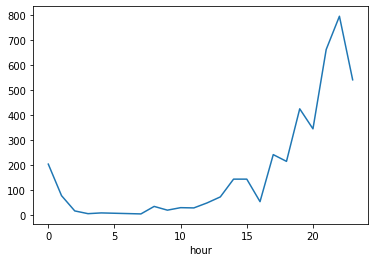

In [94]:
# ÏûÖÎ†•ÏúºÎ°ú dataframeÍ≥º Ï±ÑÎÑê urlÏùÑ ÏßëÏñ¥ÎÑ£ÏúºÎ©¥ Ìï¥Îãπ Ï±ÑÎÑêÏùò Î©îÏÑ∏ÏßÄÎßå Í∞ÄÏ†∏Ïò¥
def GetMessageByRoom(df):

  pass


from datetime import timedelta
pd.to_datetime(list_df[0]['created_at'])


df_analysis = pd.DataFrame()
# indexÎäî sender_nickname
#df_analysis.columns = ['IsCeleb', 'MessagePerDay', 'StickerPerDay', 'ImagePerDay', 'VideoPerDay' ]

ch_index = 0
for i in range(len(list_df)):
  if list_df[i].iloc[0, 1] == best_ch:
    ch_index = i
    break
print(ch_index)

list_df[ch_index]['year'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.year
list_df[ch_index]['month'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.month
list_df[ch_index]['day'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.day
list_df[ch_index]['hour'] = pd.to_datetime(list_df[ch_index]['created_at']).dt.hour

list_fan = list_df[ch_index]['sender_nickname']
for fan in list_fan:

  if  list_df[ch_index].iloc[0, 1] != best_ch:
    continue

  # ÌäπÏ†ï Î∞©Ïóê ÏûàÎäî ÏÇ¨ÎûåAÏùò chat data
  df_fan = list_df[ch_index].groupby('sender_nickname').get_group(fan)
  
  # Ïä§Ìã∞Ïª§ Î©îÏÑ∏ÏßÄÎßå ÎΩëÍ∏∞
  df_fan[df_fan['type'] == 'STICKER']
  # Ïù¥ÎØ∏ÏßÄ Î©îÏÑ∏ÏßÄÎßå ÎΩëÍ∏∞
  df_fan[df_fan['type'] == 'IMAGE']
  # ÎèôÏòÅÏÉÅ Î©îÏÑ∏ÏßÄÎßå ÎΩëÍ∏∞
  df_fan[df_fan['type'] == 'VIDEO']

  df_fan.groupby([ 'hour']).size().plot()
  print(df_fan['channel_name'])
  print(df_fan.groupby(['hour']).size())
  break
  # MessagePerDay = df_fans
  # StickerPerDay = []
  # ImagePerDay = []
  # VideoPerDay = []


# def GetMessagePerDay(df, channel_url):
#   return df_result


# df_tmp = GetMessagePerDay(df_chat, best_ch)



### 1.6 ÏãúÍ∞ÑÎ≥Ñ Ï±ÑÌåÖ Ïàò Ï∂îÏù¥(Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞)

In [95]:
df_chat['hour'] = pd.to_datetime(df_chat['created_at']).dt.hour

df_chat.groupby([ 'hour']).size().plot()
 

In [30]:
list_df[ch_index]

channel_name                                        channel_url  \
306950      üêª Í≥∞ÎèåÌåå üêª  sendbird_group_channel_90863793_15d27a6ad0ea22...   
306951      üêª Í≥∞ÎèåÌåå üêª  sendbird_group_channel_90863793_15d27a6ad0ea22...   
306952      üêª Í≥∞ÎèåÌåå üêª  sendbird_group_channel_90863793_15d27a6ad0ea22...   
306953      üêª Í≥∞ÎèåÌåå üêª  sendbird_group_channel_90863793_15d27a6ad0ea22...   
306954      üêª Í≥∞ÎèåÌåå üêª  sendbird_group_channel_90863793_15d27a6ad0ea22...   
...             ...                                                ...   
597815      üêª Í≥∞ÎèåÌåå üêª  sendbird_group_channel_90863793_15d27a6ad0ea22...   
597816      üêª Í≥∞ÎèåÌåå üêª  sendbird_group_channel_90863793_15d27a6ad0ea22...   
597817      üêª Í≥∞ÎèåÌåå üêª  sendbird_group_channel_90863793_15d27a6ad0ea22...   
597818      üêª Í≥∞ÎèåÌåå üêª  sendbird_group_channel_90863793_15d27a6ad0ea22...   
597819      üêª Í≥∞ÎèåÌåå üêª  sendbird_group_channel_90863793_15d27a6ad0ea22...   

                        sender_id sender_nickname  type  \
306950       tpgusvkeh0@gmail.com            ÏÑ∏ ÌòÑüå∏  MESG   
306951       tpgusvkeh0@gmail.com            ÏÑ∏ ÌòÑüå∏  MESG   
306952       tpgusvkeh0@gmail.com            ÏÑ∏ ÌòÑüå∏  MESG   
306953         dahye168@naver.com             ÌïòÎ¶¨Î≥¥  FILE   
306954        yeson0621@gmail.com               Îê¥  MESG   
...                           ...             ...   ...   
597815  yewon1004820905@gmail.com              ÏòÅÏõê  MESG   
597816  yewon1004820905@gmail.com              ÏòÅÏõê  MESG   
597817  yewon1004820905@gmail.com              ÏòÅÏõê  MESG   
597818  yewon1004820905@gmail.com              ÏòÅÏõê  MESG   
597819          cyonpyb@naver.com             Ïö©ÎπÑÎãà  MESG   

                                                  message  \
306950  ÏûêÍ≥†ÏûàÎäîÏßÄÎäî...Î™®Î•¥Í≤†ÏßÄÎßå!\nÍ≥µÏÇ¨ Î©ãÏßÄÍ≤å Ïûò ÎßàÎ¨¥Î¶¨ ÎêòÏóàÎäîÏßÄ..ÎßàÏùåÏóê Îì§Í≤å ÎÅùÎÇ¨Îäî...   
306951                   Ïò§Îäò ÌïòÎ£®..? Ïñ¥Ï†ú ÌïòÎ£®ÎèÑÎèÑ Í≥†ÏÉùÌñàÏñ¥! o(„ÄÉ‚Äô‚ñΩ‚Äô„ÄÉ)o   
306952  ÎÇòÎäî Í∏∞Î∂ÑÏ¢ãÏùÄ ÏùºÏù¥ ÏûàÏóàÎäîÎç∞!\nÎ≠êÎÉêÎ©¥.. Ïò§ÌõÑÏóê Î∞ñÏóê ÎÇòÍ∞îÎã§Í∞Ä ÎèåÏïÑÏò§Îäî Í∏∏Ïóê \n...   
306953  https://file-ap-2.sendbird.com/b6d0c7d05faa447...   
306954                                    ÏßÄÍ∏à Ïò¨ÎùºÏò® Í±∞ Ïûò Î≥ºÍ≤åÏöî!   
...                                                   ...   
597815                                            ÏòàÏÅòÎã§! :)   
597816                                             Î∞§Ïù¥ Îä¶ÏóàÎÑ§   
597817                                          Ìëπ Ïûò ÏûêÍ∏∏ Î∞îÎùº   
597818                                          Ïò§ÎäòÎèÑ Í≥†ÏÉùÎßéÏïòÏñ¥   
597819                               ÌçºÏ¶ê ÎßûÏ∂îÍ≥† Ïï°ÏûêÌïòÎ©¥ Î©ãÏßÄÍ∏∞ÎäîÌï†Í±∞Í∞ôÎã§   

                      created_at id type  channel_member_count  Unnamed: 9  \
306950  2022-08-28 00:53:23+0900     fan                   NaN         NaN   
306951  2022-08-28 00:54:03+0900     fan                   NaN         NaN   
306952  2022-08-28 01:36:32+0900     fan                   NaN         NaN   
306953  2022-08-28 01:37:33+0900     fan                   NaN         NaN   
306954  2022-08-28 02:28:06+0900     fan                   NaN         NaN   
...                          ...     ...                   ...         ...   
597815  2022-08-27 23:12:51+0900     fan                   NaN         NaN   
597816  2022-08-27 23:13:05+0900     fan                   NaN         NaN   
597817  2022-08-27 23:13:09+0900     fan                   NaN         NaN   
597818  2022-08-27 23:13:18+0900     fan                   NaN         NaN   
597819  2022-08-27 23:19:10+0900     fan                   NaN         NaN   

        Unnamed: 10 Unnamed: 11 new_type  year  month  day  hour  
306950          NaN         NaN     MESG  2022      8   28     0  
306951          NaN         NaN     MESG  2022      8   28     0  
306952          NaN         NaN     MESG  2022      8   28     1  
306953          NaN         NaN     FILE

In [31]:
list_df[0][list_df[0]['type'] == 'FILE']['message'].str.contains('/fancimm/sticker')

282       False
343       False
363       False
367       False
370       False
          ...  
553817     True
553822     True
553825     True
553828    False
553835    False
Name: message, Length: 960, dtype: bool

In [32]:
list_df[0][(list_df[0]['type'] != 'FILE') & (list_df[0]['message'].str.contains('mpZz'))]

Empty DataFrame
Columns: [channel_name, channel_url, sender_id, sender_nickname, type, message, created_at, id type, channel_member_count, Unnamed: 9, Unnamed: 10, Unnamed: 11, new_type]
Index: []

In [33]:


for i in range(1, 4):
  # 1Ïõî ÏûêÎ£åÎäî ÏóÜÍ≥† 2Ïõî ÏûêÎ£åÎäî 27ÏùºÎ∂ÄÌÑ∞Îùº Ï†úÏô∏
  if i > 2 :
    df_tmp = list_df[0][pd.to_datetime(list_df[0]['created_at']).dt.month == i]

df_tmp.groupby('sender_nickname').size()


sender_nickname
Kriek_        3
cem Ïπ¥Ïïº        1
ÍπÄÏ∞°Í∏ã           3
ÍπÄÏ∞∏Î≥µ           8
ÏÇºÎ≥ÑÏ¥à           9
ÏÑ∏Ï¢ÖÎåÄÏôï          2
Ïä§Î∞ïÏù¥          16
ÏèòÌÅ¨            2
ÏïÑÎãàÍº¨Ïö¥Í≥∞         7
Ïò§Î†åÏßÄÏ¢ãÏïÑ         1
Ïö∞Î¶¨Ïßë           6
ÏúÑÏπ≠           67
ÏûòÏÇ¥ÏïÑÎ≥¥ÏÑ∏         3
Ï≤´Í±∏Ïùå          11
Ï∫òÎ¶¨Ìè¨ÎãàÏïÑ_Îñ°Î≥∂Ïù¥     2
Ìë∏Î•¥Î•¥Îãà          4
ÌîÑÎ°ú_Ïù¥Î∂àÎü¨        4
ÌïòÎÇòÎäîÌïòÎÇòÏßÄ        7
ÌïòÎäòÏùòÎ∞©Ìå®        21
dtype: int64

In [ ]:
!pip install sentence_transformers
!pip install torch

In [35]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import re

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [36]:
# df = df[df['message'].str.contains('Ï∞∏Ïó¨ÌñàÏäµÎãàÎã§')== False]

NameError: ignored

In [37]:
df_MESG = df_chat[df_chat['type'] == 'MESG']
df_MESG.head()

channel_name                                        channel_url  \
0                ÍπÄÏúÑÏπ≠  sendbird_group_channel_38649690_0c2f6fa0c6fd20...   
1                ÍπÄÏúÑÏπ≠  sendbird_group_channel_38649690_0c2f6fa0c6fd20...   
2                ÏûÑÏÑ†ÎπÑ  sendbird_group_channel_46714279_5689ed3637baad...   
3         Îã¥ÏÇ¨Ïû• Î¨∏Ïó¥Ïñ¥üî•üî•üî•  sendbird_group_channel_47434712_1b4c1283dc929d...   
4  ÎΩÄÎ¶∞Í±∏ Group Channel  sendbird_group_channel_47137877_f7e02b815f1428...   

            sender_id     sender_nickname  type              message  \
0  witching_@daum.net                  ÏúÑÏπ≠  MESG      ÏúºÏñ¥~ Ïò§ÎäòÎèÑ Ïû¨Î∞åÏóâ„ÖéÏäµÎãàÎã§   
1  witching_@daum.net                  ÏúÑÏπ≠  MESG                  @,@   
2   lch6191@naver.com           dvl zzang  MESG  dvl zzang ÎãòÏù¥ ÎÇòÍ∞îÏäµÎãàÎã§.   
3    vip2405@daum.net               Î∂àÏÉàÏùòÏ†ÑÏÑ§  MESG    Îã¥ÏÇ¨Ïû• Ïò§ÎäòÎèÑ ÎÑàÎ¨¥Í≥†ÏÉùÌñàÏñ¥Ïöî~!   
4  skyshows@naver.com  Ïñ¥ÏßúÌîº ÏµúÍ≥† Í∑ÄÏó¨Ïö¥ ÏÇ¨ÎûåÏùÄ ÎΩÄÎ¶∞Í±∏  MESG               ÎΩÄÎ¶∞Í±∏ ÎßåÏÑ∏   

                 created_at id type  channel_member_count  Unnamed: 9  \
0  2022-02-27 01:03:05+0900   celeb                 135.0         NaN   
1  2022-02-27 01:03:06+0900   celeb                 135.0         NaN   
2  2022-02-27 01:05:20+0900     fan                   NaN         NaN   
3  2022-02-27 01:11:45+0900     fan                   NaN         NaN   
4  2022-02-27 01:22:00+0900     fan                   NaN         NaN   

   Unnamed: 10 Unnamed: 11 new_type  hour  
0          NaN         NaN     MESG     1  
1          NaN         NaN     MESG     1  
2          NaN         NaN     MESG     1  
3          NaN         NaN     MESG     1  
4          NaN         NaN     MESG     1

In [38]:
def clean_message(df):
  #REPLACE_NO_SPACE = re.compile()
  REPLACE_WITH_SPACE = re.compile(r'[Í∞Ä-Ìû£a-zA-Z]')

  tempArr= []
  for line in df:
    tmpL = line

    # #tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    # tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)

    tmpL = re.sub('[^A-Za-z0-9Í∞Ä-Ìû£]', ' ', tmpL)

    tempArr.append(tmpL)
  return tempArr


In [39]:
df_MESG['clean_massage'] = clean_message(df_MESG['message'])
df_MESG['clean_massage']

TypeError: ignored

In [40]:
corpus = list(df_MESG['message'])
#corpus = corpus[0:100]

In [41]:
embedder = SentenceTransformer('jhgan/ko-sroberta-multitask')
corpus_embeddings = embedder.encode(corpus)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/744 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/123 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/931 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/302 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/585 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

TypeError: ignored

In [ ]:
num_clusters = 4
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [ ]:
#word cloud
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(font_path='/content/drive/MyDrive/SUIT-Regular.ttf', width=800, height=500, random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    

In [ ]:
word_cloud(cluster_df,0)

In [ ]:
word_cloud(cluster_df,1)

In [ ]:
word_cloud(cluster_df,2)

In [ ]:
word_cloud(cluster_df,3)